## Importing Libraries

In [53]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

## Loading csv file

In [54]:
df = pd.read_csv("./iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Making the k means model

In [55]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Changing the type of 'Species' column from text to int

In [56]:
df["Species"] = df["Species"].astype('category')
df["Species_"] = df["Species"].cat.codes
df.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


## The plot of data based on Sepal Length to Sepal Width

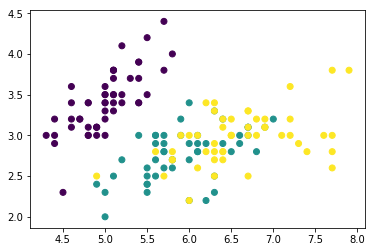

In [57]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'],c=df.Species_)

## Using MinMaxScaler to transform the data in 0-1 range

In [58]:
scaler = MinMaxScaler()
scaler.fit(df[['SepalLengthCm']])
df['SepalLengthCm'] = scaler.transform(df[['SepalLengthCm']])

scaler.fit(df[['SepalWidthCm']])
df['SepalWidthCm'] = scaler.transform(df[['SepalWidthCm']])

scaler.fit(df[['PetalLengthCm']])
df['PetalLengthCm'] = scaler.transform(df[['PetalLengthCm']])

scaler.fit(df[['PetalWidthCm']])
df['PetalWidthCm'] = scaler.transform(df[['PetalWidthCm']])

df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_
0,1,0.222222,0.625000,0.067797,0.041667,Iris-setosa,0
1,2,0.166667,0.416667,0.067797,0.041667,Iris-setosa,0
2,3,0.111111,0.500000,0.050847,0.041667,Iris-setosa,0
3,4,0.083333,0.458333,0.084746,0.041667,Iris-setosa,0
4,5,0.194444,0.666667,0.067797,0.041667,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,0.666667,0.416667,0.711864,0.916667,Iris-virginica,2
146,147,0.555556,0.208333,0.677966,0.750000,Iris-virginica,2
147,148,0.611111,0.416667,0.711864,0.791667,Iris-virginica,2
148,149,0.527778,0.583333,0.745763,0.916667,Iris-virginica,2


## Fitting and predicting using the model

In [59]:
y_predicted = km.fit_predict(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

## Making a new column named cluster to plot the graph

In [60]:
df['cluster'] = y_predicted
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_,cluster
0,1,0.222222,0.625000,0.067797,0.041667,Iris-setosa,0,0
1,2,0.166667,0.416667,0.067797,0.041667,Iris-setosa,0,0
2,3,0.111111,0.500000,0.050847,0.041667,Iris-setosa,0,0
3,4,0.083333,0.458333,0.084746,0.041667,Iris-setosa,0,0
4,5,0.194444,0.666667,0.067797,0.041667,Iris-setosa,0,0


## Scatter plot to tell the predictions

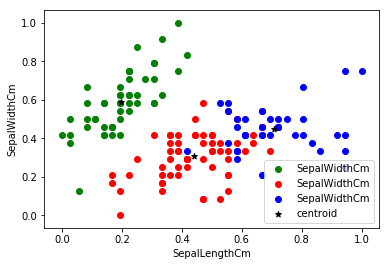

In [61]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['SepalLengthCm'],df1['SepalWidthCm'],color='green')
plt.scatter(df2['SepalLengthCm'],df2['SepalWidthCm'],color='red')
plt.scatter(df3['SepalLengthCm'],df3['SepalWidthCm'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()

## The output predictions can be shown using model.labels_

In [62]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

## Crosstab to show the results

In [63]:
pd.crosstab(df['Species_'],km.labels_)

col_0,0,1,2
Species_,,,
0,50,0,0
1,0,47,3
2,0,14,36


## Elbow Method

### This method can be used to know how many clusters should be used to get the maximum correct output on our predictions.

In [50]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
    sse.append(km.inertia_)

In [51]:
sse

[41.138172022977756,
 12.14368828157972,
 6.998114004826761,
 5.532831003081898,
 4.571923613060553,
 3.991874673889029,
 3.4645972936765066,
 3.1181649565099363,
 2.820289857591855]

### The error at '3' is where the error is less as well as it is best used for predicting on test dataset. 
### The errors above '3' are less but these points fall under overfitting category which is not the best for predicting on test dataset.

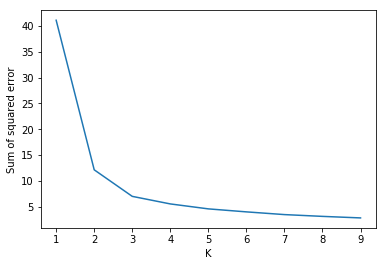

In [52]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)